# Distancias

In [28]:
from scipy.spatial import distance_matrix
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/movies/movies.csv", sep=";")
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [29]:
#Ya que los ids no nos importan:
data_movies = data[["star_wars", "lord_of_the_rings", "harry_potter"]]
data_movies.head()

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6


In [31]:
#No hay que normalizar porque todas las películas están en el rango [0,10]
#Obtenemos la distancia euclídea (por ejemplo, podríamos obtener la que queramos variando p)
d_matrix = pd.DataFrame(distance_matrix(data_movies, data_movies, p=2), index=data["user_id"], columns=data["user_id"])
d_matrix

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


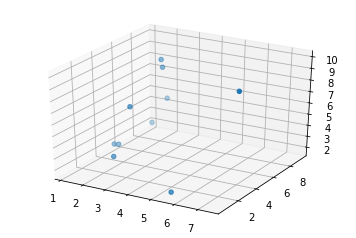

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data_movies["star_wars"], ys=data["lord_of_the_rings"], zs=data["harry_potter"])